In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import statistics
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import datetime
from scipy.stats import chi2_contingency
import scipy

In [2]:
fraudTest = pd.read_csv('C:\\Users\\USER\\Desktop\\Final code\\fraudTest.csv')

In [3]:
fraudTrain = pd.read_csv('C:\\Users\\USER\\Desktop\\Final code\\fraudTrain.csv')

In [4]:
fraudTrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
fraudTest= fraudTest[:100]

In [6]:
fraudTest.dropna(inplace = True)
fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             100 non-null    int64  
 1   trans_date_trans_time  100 non-null    object 
 2   cc_num                 100 non-null    int64  
 3   merchant               100 non-null    object 
 4   category               100 non-null    object 
 5   amt                    100 non-null    float64
 6   first                  100 non-null    object 
 7   last                   100 non-null    object 
 8   gender                 100 non-null    object 
 9   street                 100 non-null    object 
 10  city                   100 non-null    object 
 11  state                  100 non-null    object 
 12  zip                    100 non-null    int64  
 13  lat                    100 non-null    float64
 14  long                   100 non-null    float64
 15  city_po

In [13]:
fraudTest.drop(['cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'zip', 'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'], axis = 1, inplace = True)

In [14]:
fraudTest

,Unnamed: 0,trans_date_trans_time,amt,gender,state,job,dob,year,month,day
0,0,2020-06-21 12:14:25,2.86,M,SC,Mechanical engineer,1968-03-19,1968,03,19
1,1,2020-06-21 12:14:33,29.84,F,UT,"Sales professional, IT",1990-01-17,1990,01,17
2,2,2020-06-21 12:14:53,41.28,F,NY,"Librarian, public",1970-10-21,1970,10,21
3,3,2020-06-21 12:15:15,60.05,M,FL,Set designer,1987-07-25,1987,07,25
4,4,2020-06-21 12:15:17,3.19,M,MI,Furniture designer,1955-07-06,1955,07,06
...,...,...,...,...,...,...,...,...,...,...
95,95,2020-06-21 12:43:14,37.14,F,AR,Electrical engineer,1993-04-08,1993,04,08
96,96,2020-06-21 12:43:58,16.06,M,OH,Equities trader,1966-01-04,1966,01,04
97,97,2020-06-21 12:44:12,1.01,F,VA,Energy engineer,1985-09-02,1985,09,02
98,98,2020-06-21 12:44:29,6.98,M,MI,Police officer,1971-11-05,1971,11,05


In [15]:
fraudTest.drop(['trans_date_trans_time'], axis = 1, inplace = True)

In [16]:
fraudTest

,Unnamed: 0,amt,gender,state,job,dob,year,month,day
0,0,2.86,M,SC,Mechanical engineer,1968-03-19,1968,03,19
1,1,29.84,F,UT,"Sales professional, IT",1990-01-17,1990,01,17
2,2,41.28,F,NY,"Librarian, public",1970-10-21,1970,10,21
3,3,60.05,M,FL,Set designer,1987-07-25,1987,07,25
4,4,3.19,M,MI,Furniture designer,1955-07-06,1955,07,06
...,...,...,...,...,...,...,...,...,...
95,95,37.14,F,AR,Electrical engineer,1993-04-08,1993,04,08
96,96,16.06,M,OH,Equities trader,1966-01-04,1966,01,04
97,97,1.01,F,VA,Energy engineer,1985-09-02,1985,09,02
98,98,6.98,M,MI,Police officer,1971-11-05,1971,11,05


In [17]:
def gender_recode (series):
    if series == "F":
        return 0
    if series == "M":
        return 1
    
fraudTest['genderR'] = fraudTest['gender'].apply(gender_recode) 

In [18]:
fraudTest

,Unnamed: 0,amt,gender,state,job,dob,year,month,day,genderR
0,0,2.86,M,SC,Mechanical engineer,1968-03-19,1968,03,19,1
1,1,29.84,F,UT,"Sales professional, IT",1990-01-17,1990,01,17,0
2,2,41.28,F,NY,"Librarian, public",1970-10-21,1970,10,21,0
3,3,60.05,M,FL,Set designer,1987-07-25,1987,07,25,1
4,4,3.19,M,MI,Furniture designer,1955-07-06,1955,07,06,1
...,...,...,...,...,...,...,...,...,...,...
95,95,37.14,F,AR,Electrical engineer,1993-04-08,1993,04,08,0
96,96,16.06,M,OH,Equities trader,1966-01-04,1966,01,04,1
97,97,1.01,F,VA,Energy engineer,1985-09-02,1985,09,02,0
98,98,6.98,M,MI,Police officer,1971-11-05,1971,11,05,1


In [19]:
def state_recode (series):
    if series == "NY":
        return 0
    if series == "FL":
        return 1
    if series == "TX":
        return 2
    if series == "MI":
        return 3
    if series == "CA":
        return 4
    if series == "NJ":
        return 5
    if series == "WI":
        return 6
    if series == "AR":
        return 7
    if series == "AL":
        return 8
    if series == "MO":
        return 9
    if series == "OH":
        return 10
    if series == "MD":
        return 11
    if series == "KY":
        return 12
    if series == "WY":
        return 13
    if series == "PA":
        return 14
    if series == "WV":
        return 15
    if series == "MS":
        return 16
    if series == "IA":
        return 17
    if series == "SC":
        return 18
    if series == "SD":
        return 19
    if series == "LA":
        return 20
    if series == "VT":
        return 21
    if series == "UT":
        return 22
    if series == "MT":
        return 23
    if series == "NE":
        return 24
    if series == "MA":
        return 25
    if series == "NM":
        return 26
    if series == "WA":
        return 27
    if series == "OK":
        return 28
    if series == "MN":
        return 29
    if series == "AZ":
        return 30
    if series == "DC":
        return 31
    if series == "TN":
        return 32
    if series == "ME":
        return 33
    if series == "IL":
        return 34
    if series == "KS":
        return 35
    if series == "GA":
        return 36
    if series == "CO":
        return 37
    if series == "VA":
        return 38
    
fraudTest['stateR'] = fraudTest['state'].apply(state_recode) 

In [20]:
fraudTest

,Unnamed: 0,amt,gender,state,job,dob,year,month,day,genderR,stateR
0,0,2.86,M,SC,Mechanical engineer,1968-03-19,1968,03,19,1,18
1,1,29.84,F,UT,"Sales professional, IT",1990-01-17,1990,01,17,0,22
2,2,41.28,F,NY,"Librarian, public",1970-10-21,1970,10,21,0,0
3,3,60.05,M,FL,Set designer,1987-07-25,1987,07,25,1,1
4,4,3.19,M,MI,Furniture designer,1955-07-06,1955,07,06,1,3
...,...,...,...,...,...,...,...,...,...,...,...
95,95,37.14,F,AR,Electrical engineer,1993-04-08,1993,04,08,0,7
96,96,16.06,M,OH,Equities trader,1966-01-04,1966,01,04,1,10
97,97,1.01,F,VA,Energy engineer,1985-09-02,1985,09,02,0,38
98,98,6.98,M,MI,Police officer,1971-11-05,1971,11,05,1,3


In [21]:
fraudTrain.drop(['cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'zip', 'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'], axis = 1, inplace = True)

In [22]:
fraudTrain

,Unnamed: 0,trans_date_trans_time,amt,gender,state,job,dob
0,0,2019-01-01 00:00:18,4.97,F,NC,"Psychologist, counselling",1988-03-09
1,1,2019-01-01 00:00:44,107.23,F,WA,Special educational needs teacher,1978-06-21
2,2,2019-01-01 00:00:51,220.11,M,ID,Nature conservation officer,1962-01-19
3,3,2019-01-01 00:01:16,45.00,M,MT,Patent attorney,1967-01-12
4,4,2019-01-01 00:03:06,41.96,M,VA,Dance movement psychotherapist,1986-03-28
...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,15.56,M,UT,Geoscientist,1961-11-24
1296671,1296671,2020-06-21 12:12:19,51.70,M,MD,"Production assistant, television",1979-12-11
1296672,1296672,2020-06-21 12:12:32,105.93,M,NM,Naval architect,1967-08-30
1296673,1296673,2020-06-21 12:13:36,74.90,M,SD,Volunteer coordinator,1980-08-18


In [23]:
fraudTrain.drop(['trans_date_trans_time'], axis = 1, inplace = True)

In [24]:
def gender_recode (series):
    if series == "F":
        return 0
    if series == "M":
        return 1
    
fraudTrain['genderR'] = fraudTrain['gender'].apply(gender_recode) 

In [25]:
fraudTrain

,Unnamed: 0,amt,gender,state,job,dob,genderR
0,0,4.97,F,NC,"Psychologist, counselling",1988-03-09,0
1,1,107.23,F,WA,Special educational needs teacher,1978-06-21,0
2,2,220.11,M,ID,Nature conservation officer,1962-01-19,1
3,3,45.00,M,MT,Patent attorney,1967-01-12,1
4,4,41.96,M,VA,Dance movement psychotherapist,1986-03-28,1
...,...,...,...,...,...,...,...
1296670,1296670,15.56,M,UT,Geoscientist,1961-11-24,1
1296671,1296671,51.70,M,MD,"Production assistant, television",1979-12-11,1
1296672,1296672,105.93,M,NM,Naval architect,1967-08-30,1
1296673,1296673,74.90,M,SD,Volunteer coordinator,1980-08-18,1


In [28]:
fraudTrain= fraudTrain[:100]

In [27]:
def state_recode (series):
    if series == "PA":
        return 0
    if series == "MI":
        return 1
    if series == "IA":
        return 2
    if series == "KS":
        return 3
    if series == "NJ":
        return 4
    if series == "NY":
        return 5
    if series == "TX":
        return 6
    if series == "VA":
        return 7
    if series == "FL":
        return 8
    if series == "UT":
        return 9
    if series == "CA":
        return 10
    if series == "AR":
        return 11
    if series == "MD":
        return 12
    if series == "IN":
        return 13
    if series == "MS":
        return 14
    if series == "WA":
        return 15
    if series == "KY":
        return 16
    if series == "OH":
        return 17
    if series == "OR":
        return 18
    if series == "NE":
        return 19
    if series == "NC":
        return 20
    if series == "WY":
        return 21
    if series == "WI":
        return 22
    if series == "MA":
        return 23
    if series == "OK":
        return 24
    if series == "TN":
        return 25
    if series == "MT":
        return 26
    if series == "GA":
        return 27
    if series == "AZ":
        return 28
    if series == "CO":
        return 29
    if series == "VT":
        return 30
    if series == "MO":
        return 31
    if series == "MN":
        return 32
    if series == "SC":
        return 33
    if series == "HI":
        return 34
    if series == "ME":
        return 35
    if series == "AL":
        return 36
    if series == "DC":
        return 37
    if series == "LA":
        return 38
    if series == "NM":
        return 39
    if series == "WV":
        return 40
    if series == "ID":
        return 41
    if series == "NV":
        return 42
        
    
fraudTrain['stateR'] = fraudTrain['state'].apply(state_recode)   

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\2019197179.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudTrain['stateR'] = fraudTrain['state'].apply(state_recode)


In [29]:
fraudTrain

,Unnamed: 0,amt,gender,state,job,dob,genderR,stateR
0,0,4.97,F,NC,"Psychologist, counselling",1988-03-09,0,20
1,1,107.23,F,WA,Special educational needs teacher,1978-06-21,0,15
2,2,220.11,M,ID,Nature conservation officer,1962-01-19,1,41
3,3,45.00,M,MT,Patent attorney,1967-01-12,1,26
4,4,41.96,M,VA,Dance movement psychotherapist,1986-03-28,1,7
...,...,...,...,...,...,...,...,...
95,95,3.35,F,IA,Engineering geologist,1971-08-20,0,2
96,96,50.61,M,IA,Agricultural consultant,1957-03-06,1,2
97,97,50.74,F,TX,Systems developer,1970-09-11,0,6
98,98,186.73,F,FL,Paramedic,1977-01-04,0,8


In [30]:
fraudTest

,Unnamed: 0,amt,gender,state,job,dob,year,month,day,genderR,stateR
0,0,2.86,M,SC,Mechanical engineer,1968-03-19,1968,03,19,1,18
1,1,29.84,F,UT,"Sales professional, IT",1990-01-17,1990,01,17,0,22
2,2,41.28,F,NY,"Librarian, public",1970-10-21,1970,10,21,0,0
3,3,60.05,M,FL,Set designer,1987-07-25,1987,07,25,1,1
4,4,3.19,M,MI,Furniture designer,1955-07-06,1955,07,06,1,3
...,...,...,...,...,...,...,...,...,...,...,...
95,95,37.14,F,AR,Electrical engineer,1993-04-08,1993,04,08,0,7
96,96,16.06,M,OH,Equities trader,1966-01-04,1966,01,04,1,10
97,97,1.01,F,VA,Energy engineer,1985-09-02,1985,09,02,0,38
98,98,6.98,M,MI,Police officer,1971-11-05,1971,11,05,1,3


In [31]:
fraudTest.dob.value_counts()

1980-07-12    2
1948-11-30    2
1976-02-26    2
1978-01-22    2
1937-03-17    2
             ..
1974-07-19    1
1930-02-28    1
1957-12-29    1
1968-10-06    1
1965-04-07    1
Name: dob, Length: 95, dtype: int64

In [8]:
# recoding age from DOB column for both datasets

In [9]:
#fraudTest

In [32]:
fraudTest[['year', 'month', 'day']] = fraudTest['dob'].str.split('-', expand=True)

In [33]:
fraudTest.head()

,Unnamed: 0,amt,gender,state,job,dob,year,month,day,genderR,stateR
0,0,2.86,M,SC,Mechanical engineer,1968-03-19,1968,03,19,1,18
1,1,29.84,F,UT,"Sales professional, IT",1990-01-17,1990,01,17,0,22
2,2,41.28,F,NY,"Librarian, public",1970-10-21,1970,10,21,0,0
3,3,60.05,M,FL,Set designer,1987-07-25,1987,07,25,1,1
4,4,3.19,M,MI,Furniture designer,1955-07-06,1955,07,06,1,3


In [34]:
age = []
for value in fraudTest["year"]:
   fraudTest["age"] = 2023 - value

print(fraudTest)

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [35]:
type(fraudTest["year"])

pandas.core.series.Series

In [36]:
fraudTest["year"] = fraudTest["year"].astype(int)

In [37]:
fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   amt         100 non-null    float64
 2   gender      100 non-null    object 
 3   state       100 non-null    object 
 4   job         100 non-null    object 
 5   dob         100 non-null    object 
 6   year        100 non-null    int32  
 7   month       100 non-null    object 
 8   day         100 non-null    object 
 9   genderR     100 non-null    int64  
 10  stateR      100 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(6)
memory usage: 8.3+ KB


In [38]:
def source (series):
    if series == 2023:
        return 0
    else: return 2023-series

fraudTest['age'] = fraudTest["year"].apply(source)

In [39]:
fraudTest.head()

,Unnamed: 0,amt,gender,state,job,dob,year,month,day,genderR,stateR,age
0,0,2.86,M,SC,Mechanical engineer,1968-03-19,1968,03,19,1,18,55
1,1,29.84,F,UT,"Sales professional, IT",1990-01-17,1990,01,17,0,22,33
2,2,41.28,F,NY,"Librarian, public",1970-10-21,1970,10,21,0,0,53
3,3,60.05,M,FL,Set designer,1987-07-25,1987,07,25,1,1,36
4,4,3.19,M,MI,Furniture designer,1955-07-06,1955,07,06,1,3,68


In [40]:
fraudTest.age.value_counts()

49    6
37    5
53    4
59    4
38    4
55    3
46    3
43    3
45    3
34    3
35    3
52    3
26    3
36    3
51    3
86    2
47    2
44    2
24    2
48    2
57    2
39    2
32    2
30    2
75    2
66    2
31    2
56    2
74    1
25    1
23    1
41    1
89    1
85    1
65    1
94    1
29    1
80    1
62    1
54    1
28    1
33    1
93    1
27    1
67    1
50    1
72    1
68    1
58    1
Name: age, dtype: int64

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

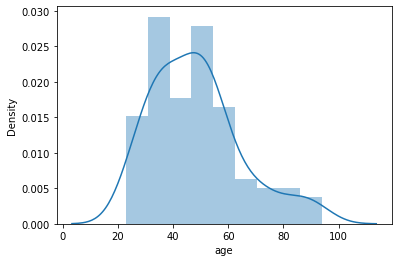

In [41]:
sns.distplot(fraudTest['age'])

In [ ]:
#fraudTrain

In [42]:
fraudTrain[['year', 'month', 'day']] = fraudTrain['dob'].str.split('-', expand=True)

In [43]:
fraudTrain.head()

,Unnamed: 0,amt,gender,state,job,dob,genderR,stateR,year,month,day
0,0,4.97,F,NC,"Psychologist, counselling",1988-03-09,0,20,1988,03,09
1,1,107.23,F,WA,Special educational needs teacher,1978-06-21,0,15,1978,06,21
2,2,220.11,M,ID,Nature conservation officer,1962-01-19,1,41,1962,01,19
3,3,45.00,M,MT,Patent attorney,1967-01-12,1,26,1967,01,12
4,4,41.96,M,VA,Dance movement psychotherapist,1986-03-28,1,7,1986,03,28


In [44]:
fraudTrain["year"] = fraudTrain["year"].astype(int)

In [45]:
age = []
for value in fraudTrain["year"]:
   fraudTrain["age"] = 2023 - value

print(fraudTrain)

    Unnamed: 0     amt gender state                                job  \
0            0    4.97      F    NC          Psychologist, counselling   
1            1  107.23      F    WA  Special educational needs teacher   
2            2  220.11      M    ID        Nature conservation officer   
3            3   45.00      M    MT                    Patent attorney   
4            4   41.96      M    VA     Dance movement psychotherapist   
..         ...     ...    ...   ...                                ...   
95          95    3.35      F    IA              Engineering geologist   
96          96   50.61      M    IA            Agricultural consultant   
97          97   50.74      F    TX                  Systems developer   
98          98  186.73      F    FL                          Paramedic   
99          99   39.95      M    AR                  Financial adviser   

           dob  genderR  stateR  year month day  age  
0   1988-03-09        0      20  1988    03  09   37  
1

In [46]:
fraudTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   amt         100 non-null    float64
 2   gender      100 non-null    object 
 3   state       100 non-null    object 
 4   job         100 non-null    object 
 5   dob         100 non-null    object 
 6   genderR     100 non-null    int64  
 7   stateR      100 non-null    int64  
 8   year        100 non-null    int32  
 9   month       100 non-null    object 
 10  day         100 non-null    object 
 11  age         100 non-null    int64  
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 9.1+ KB


In [47]:
def source (series):
    if series == 2023:
        return 0
    else: return 2023-series

fraudTrain['age'] = fraudTrain["year"].apply(source)

In [48]:
fraudTrain.age.value_counts()

49    6
53    4
52    4
77    4
39    4
56    4
62    3
30    3
36    3
46    3
61    3
69    3
47    3
57    3
37    3
68    2
25    2
29    2
66    2
51    2
81    2
88    2
48    2
40    2
35    2
28    2
34    2
43    2
58    2
33    2
59    2
78    2
76    1
82    1
41    1
23    1
44    1
45    1
87    1
97    1
42    1
71    1
85    1
63    1
26    1
Name: age, dtype: int64

In [49]:
fraudTrain.head()

,Unnamed: 0,amt,gender,state,job,dob,genderR,stateR,year,month,day,age
0,0,4.97,F,NC,"Psychologist, counselling",1988-03-09,0,20,1988,03,09,35
1,1,107.23,F,WA,Special educational needs teacher,1978-06-21,0,15,1978,06,21,45
2,2,220.11,M,ID,Nature conservation officer,1962-01-19,1,41,1962,01,19,61
3,3,45.00,M,MT,Patent attorney,1967-01-12,1,26,1967,01,12,56
4,4,41.96,M,VA,Dance movement psychotherapist,1986-03-28,1,7,1986,03,28,37


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

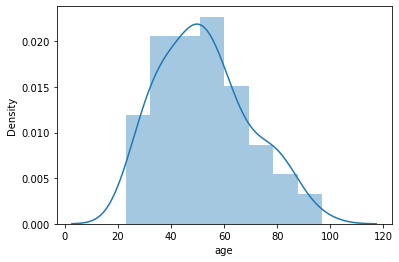

In [50]:
sns.distplot(fraudTrain['age'])

In [ ]:
# Independant Chi-square with crosstab between age and gender

In [ ]:
#fraudTest

In [51]:
fraudTest_crosstab = pd.crosstab(fraudTest['age'], fraudTest['gender'])

In [52]:
stats.chi2_contingency(fraudTest_crosstab)

(61.13782051282051,
 0.09651481997298271,
 48,
 array([[0.52, 0.48],
        [1.04, 0.96],
        [0.52, 0.48],
        [1.56, 1.44],
        [0.52, 0.48],
        [0.52, 0.48],
        [0.52, 0.48],
        [1.04, 0.96],
        [1.04, 0.96],
        [1.04, 0.96],
        [0.52, 0.48],
        [1.56, 1.44],
        [1.56, 1.44],
        [1.56, 1.44],
        [2.6 , 2.4 ],
        [2.08, 1.92],
        [1.04, 0.96],
        [0.52, 0.48],
        [1.56, 1.44],
        [1.04, 0.96],
        [1.56, 1.44],
        [1.56, 1.44],
        [1.04, 0.96],
        [1.04, 0.96],
        [3.12, 2.88],
        [0.52, 0.48],
        [1.56, 1.44],
        [1.56, 1.44],
        [2.08, 1.92],
        [0.52, 0.48],
        [1.56, 1.44],
        [1.04, 0.96],
        [1.04, 0.96],
        [0.52, 0.48],
        [2.08, 1.92],
        [0.52, 0.48],
        [0.52, 0.48],
        [1.04, 0.96],
        [0.52, 0.48],
        [0.52, 0.48],
        [0.52, 0.48],
        [0.52, 0.48],
        [1.04, 0.96],
       

In [53]:
#fraudTrain

In [57]:
fraudTrain_crosstab = pd.crosstab(fraudTrain['age'], fraudTrain['gender'])

In [58]:
stats.chi2_contingency(fraudTrain_crosstab)

(56.263354700854705,
 0.10168020705207688,
 44,
 array([[0.52, 0.48],
        [1.04, 0.96],
        [0.52, 0.48],
        [1.04, 0.96],
        [1.04, 0.96],
        [1.56, 1.44],
        [1.04, 0.96],
        [1.04, 0.96],
        [1.04, 0.96],
        [1.56, 1.44],
        [1.56, 1.44],
        [2.08, 1.92],
        [1.04, 0.96],
        [0.52, 0.48],
        [0.52, 0.48],
        [1.04, 0.96],
        [0.52, 0.48],
        [0.52, 0.48],
        [1.56, 1.44],
        [1.56, 1.44],
        [1.04, 0.96],
        [3.12, 2.88],
        [1.04, 0.96],
        [2.08, 1.92],
        [2.08, 1.92],
        [2.08, 1.92],
        [1.56, 1.44],
        [1.04, 0.96],
        [1.04, 0.96],
        [1.56, 1.44],
        [1.56, 1.44],
        [0.52, 0.48],
        [1.04, 0.96],
        [1.04, 0.96],
        [1.56, 1.44],
        [0.52, 0.48],
        [0.52, 0.48],
        [2.08, 1.92],
        [1.04, 0.96],
        [1.04, 0.96],
        [0.52, 0.48],
        [0.52, 0.48],
        [0.52, 0.48],
      

In [59]:
# Anova equation

In [60]:
#fraudtest - amt

In [61]:
fraudTest

,Unnamed: 0,amt,gender,state,job,dob,year,month,day,genderR,stateR,age
0,0,2.86,M,SC,Mechanical engineer,1968-03-19,1968,03,19,1,18,55
1,1,29.84,F,UT,"Sales professional, IT",1990-01-17,1990,01,17,0,22,33
2,2,41.28,F,NY,"Librarian, public",1970-10-21,1970,10,21,0,0,53
3,3,60.05,M,FL,Set designer,1987-07-25,1987,07,25,1,1,36
4,4,3.19,M,MI,Furniture designer,1955-07-06,1955,07,06,1,3,68
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,37.14,F,AR,Electrical engineer,1993-04-08,1993,04,08,0,7,30
96,96,16.06,M,OH,Equities trader,1966-01-04,1966,01,04,1,10,57
97,97,1.01,F,VA,Energy engineer,1985-09-02,1985,09,02,0,38,38
98,98,6.98,M,MI,Police officer,1971-11-05,1971,11,05,1,3,52


In [66]:
test1 = fraudTest[['amt', 'genderR', 'stateR', 'age']]


In [67]:
test1.head()

,amt,genderR,stateR,age
0,2.86,1,18,55
1,29.84,0,22,33
2,41.28,0,0,53
3,60.05,1,1,36
4,3.19,1,3,68


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amt', ylabel='Density'>

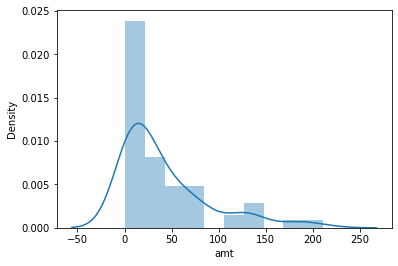

In [68]:
sns.distplot(test1['amt'])

In [70]:
test1['amtSQRT'] = np.sqrt(test1['amt'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\4011242787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['amtSQRT'] = np.sqrt(test1['amt'])


In [71]:
test1.head()

,amt,genderR,stateR,age,amtSQRT
0,2.86,1,18,55,1.691153
1,29.84,0,22,33,5.462600
2,41.28,0,0,53,6.424951
3,60.05,1,1,36,7.749194
4,3.19,1,3,68,1.786057


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amtSQRT', ylabel='Density'>

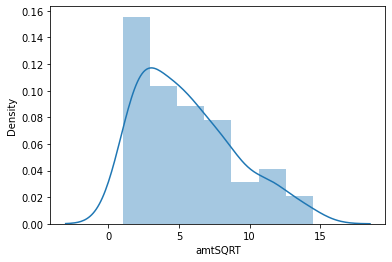

In [72]:
sns.distplot(test1['amtSQRT'])

In [73]:
test1['amtLOG'] = np.log(test1['amt'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\165662576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['amtLOG'] = np.log(test1['amt'])


In [74]:
test1.head()

,amt,genderR,stateR,age,amtSQRT,amtLOG
0,2.86,1,18,55,1.691153,1.050822
1,29.84,0,22,33,5.462600,3.395850
2,41.28,0,0,53,6.424951,3.720378
3,60.05,1,1,36,7.749194,4.095178
4,3.19,1,3,68,1.786057,1.160021


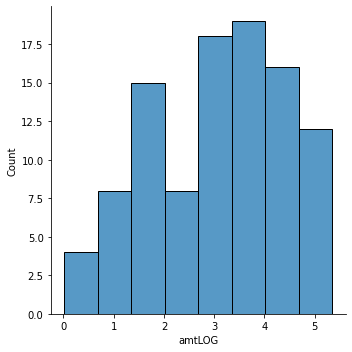

In [75]:
sns.displot(test1['amtLOG'])

In [76]:
# homogeneity of Varaince

In [92]:
scipy.stats.bartlett(test1['amtLOG'], test1['amt'])

BartlettResult(statistic=568.9134676073359, pvalue=9.67535866989454e-126)

In [89]:
# fligners test

In [93]:
scipy.stats.fligner(test1['amtSQRT'], test1['amt'])

FlignerResult(statistic=103.96691703328811, pvalue=2.0572261632985525e-24)

In [94]:
# ANOVA for gender

In [95]:
test1 = fraudTest[['amt', 'genderR', 'stateR', 'age']]

In [96]:
test1.head()

,amt,genderR,stateR,age
0,2.86,1,18,55
1,29.84,0,22,33
2,41.28,0,0,53
3,60.05,1,1,36
4,3.19,1,3,68


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='genderR', ylabel='Density'>

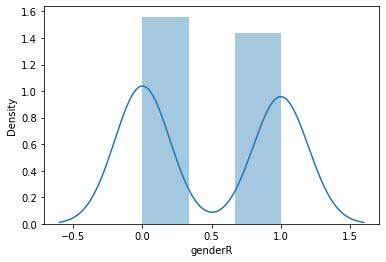

In [97]:
sns.distplot(test1['genderR'])

In [98]:
test1['genderRSQRT'] = np.sqrt(test1['genderR'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\2709121412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['genderRSQRT'] = np.sqrt(test1['genderR'])


In [99]:
test1.head()

,amt,genderR,stateR,age,genderRSQRT
0,2.86,1,18,55,1.0
1,29.84,0,22,33,0.0
2,41.28,0,0,53,0.0
3,60.05,1,1,36,1.0
4,3.19,1,3,68,1.0


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='genderRSQRT', ylabel='Density'>

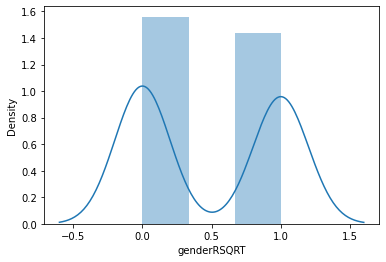

In [100]:
sns.distplot(test1['genderRSQRT'])

In [101]:
test1['genderRLOG'] = np.log(test1['genderR'])

C:\Python3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_9620\2020313024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['genderRLOG'] = np.log(test1['genderR'])


In [102]:
test1.head()

,amt,genderR,stateR,age,genderRSQRT,genderRLOG
0,2.86,1,18,55,1.0,0.0
1,29.84,0,22,33,0.0,-inf
2,41.28,0,0,53,0.0,-inf
3,60.05,1,1,36,1.0,0.0
4,3.19,1,3,68,1.0,0.0


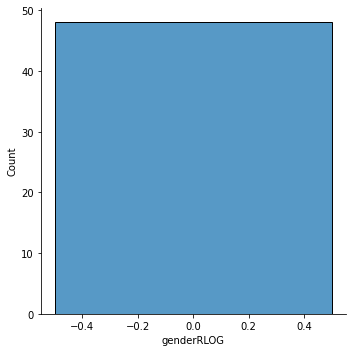

In [103]:
sns.displot(test1['genderRLOG'])

In [104]:
# Homogeneity of Variance

In [105]:
scipy.stats.bartlett(test1['genderRLOG'], test1['genderR'])

BartlettResult(statistic=nan, pvalue=nan)

In [106]:
#Fligners test

In [107]:
scipy.stats.fligner(test1['genderRSQRT'], test1['genderR'])

FlignerResult(statistic=1.398312892123436e-29, pvalue=0.999999999999997)

In [108]:
#ANOVA for state

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stateR', ylabel='Density'>

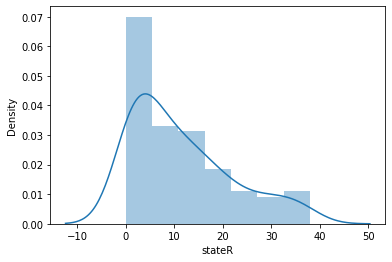

In [109]:
sns.distplot(test1['stateR'])

In [110]:
test1['stateRSQRT'] = np.sqrt(test1['stateR'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\660044328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['stateRSQRT'] = np.sqrt(test1['stateR'])


In [111]:
test1.head()

,amt,genderR,stateR,age,genderRSQRT,genderRLOG,stateRSQRT
0,2.86,1,18,55,1.0,0.0,4.242641
1,29.84,0,22,33,0.0,-inf,4.690416
2,41.28,0,0,53,0.0,-inf,0.000000
3,60.05,1,1,36,1.0,0.0,1.000000
4,3.19,1,3,68,1.0,0.0,1.732051


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stateRSQRT', ylabel='Density'>

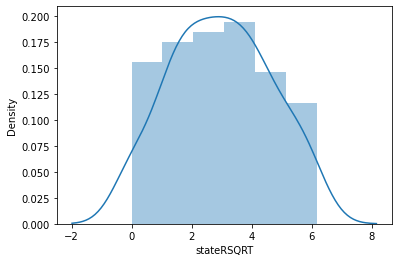

In [112]:
sns.distplot(test1['stateRSQRT'])

In [113]:
test1['stateRLOG'] = np.log(test1['stateR'])

C:\Python3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_9620\3558112486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['stateRLOG'] = np.log(test1['stateR'])


In [114]:
test1.head()

,amt,genderR,stateR,age,genderRSQRT,genderRLOG,stateRSQRT,stateRLOG
0,2.86,1,18,55,1.0,0.0,4.242641,2.890372
1,29.84,0,22,33,0.0,-inf,4.690416,3.091042
2,41.28,0,0,53,0.0,-inf,0.000000,-inf
3,60.05,1,1,36,1.0,0.0,1.000000,0.000000
4,3.19,1,3,68,1.0,0.0,1.732051,1.098612


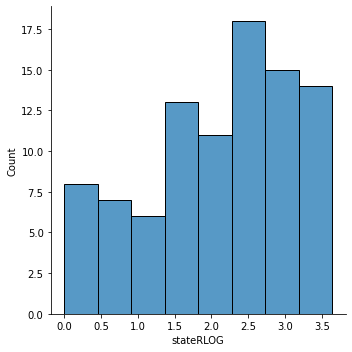

In [115]:
sns.displot(test1['stateRLOG'])

In [116]:
#HOmogeneity of Variance

In [117]:
scipy.stats.bartlett(test1['stateRLOG'], test1['stateR'])

BartlettResult(statistic=nan, pvalue=nan)

In [118]:
#Fligners test

In [119]:
scipy.stats.fligner(test1['stateRSQRT'], test1['stateR'])

FlignerResult(statistic=91.5811692286186, pvalue=1.0710741617818809e-21)

In [120]:
#ANOVA for age

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

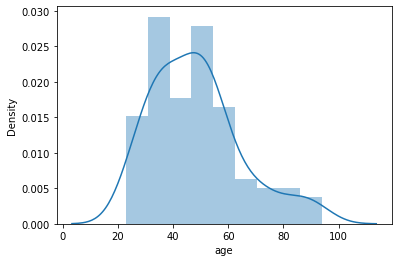

In [121]:
sns.distplot(test1['age'])

In [122]:
test1['ageSQRT'] = np.sqrt(test1['age'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\3453685551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['ageSQRT'] = np.sqrt(test1['age'])


In [123]:
test1.head()

,amt,genderR,stateR,age,genderRSQRT,genderRLOG,stateRSQRT,stateRLOG,ageSQRT
0,2.86,1,18,55,1.0,0.0,4.242641,2.890372,7.416198
1,29.84,0,22,33,0.0,-inf,4.690416,3.091042,5.744563
2,41.28,0,0,53,0.0,-inf,0.000000,-inf,7.280110
3,60.05,1,1,36,1.0,0.0,1.000000,0.000000,6.000000
4,3.19,1,3,68,1.0,0.0,1.732051,1.098612,8.246211


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ageSQRT', ylabel='Density'>

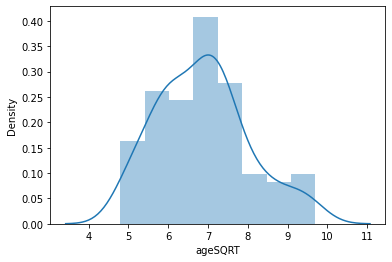

In [124]:
sns.distplot(test1['ageSQRT'])

In [125]:
test1['ageLOG'] = np.log(test1['age'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\1931934170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['ageLOG'] = np.log(test1['age'])


In [126]:
test1.head()

,amt,genderR,stateR,age,genderRSQRT,genderRLOG,stateRSQRT,stateRLOG,ageSQRT,ageLOG
0,2.86,1,18,55,1.0,0.0,4.242641,2.890372,7.416198,4.007333
1,29.84,0,22,33,0.0,-inf,4.690416,3.091042,5.744563,3.496508
2,41.28,0,0,53,0.0,-inf,0.000000,-inf,7.280110,3.970292
3,60.05,1,1,36,1.0,0.0,1.000000,0.000000,6.000000,3.583519
4,3.19,1,3,68,1.0,0.0,1.732051,1.098612,8.246211,4.219508


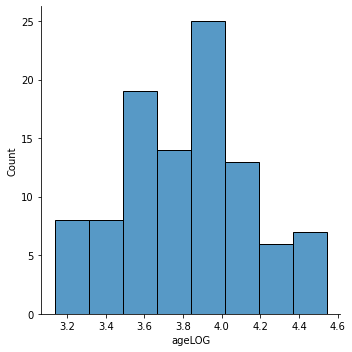

In [127]:
sns.displot(test1['ageLOG'])

In [128]:
#Homogeneity of Variance

In [129]:
scipy.stats.bartlett(test1['ageLOG'], test1['age'])

BartlettResult(statistic=631.7077118274669, pvalue=2.1252521681186953e-139)

In [130]:
#Fligners test

In [131]:
scipy.stats.fligner(test1['ageSQRT'], test1['age'])

FlignerResult(statistic=108.18953035360919, pvalue=2.442665586099835e-25)

In [132]:
#ANOVA fraudTrain
#ANOVA for amt

In [133]:
fraudTrain

,Unnamed: 0,amt,gender,state,job,dob,genderR,stateR,year,month,day,age
0,0,4.97,F,NC,"Psychologist, counselling",1988-03-09,0,20,1988,03,09,35
1,1,107.23,F,WA,Special educational needs teacher,1978-06-21,0,15,1978,06,21,45
2,2,220.11,M,ID,Nature conservation officer,1962-01-19,1,41,1962,01,19,61
3,3,45.00,M,MT,Patent attorney,1967-01-12,1,26,1967,01,12,56
4,4,41.96,M,VA,Dance movement psychotherapist,1986-03-28,1,7,1986,03,28,37
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,3.35,F,IA,Engineering geologist,1971-08-20,0,2,1971,08,20,52
96,96,50.61,M,IA,Agricultural consultant,1957-03-06,1,2,1957,03,06,66
97,97,50.74,F,TX,Systems developer,1970-09-11,0,6,1970,09,11,53
98,98,186.73,F,FL,Paramedic,1977-01-04,0,8,1977,01,04,46


In [134]:
test1 = fraudTrain[['amt', 'genderR', 'stateR', 'age']]

In [135]:
test1.head()

,amt,genderR,stateR,age
0,4.97,0,20,35
1,107.23,0,15,45
2,220.11,1,41,61
3,45.00,1,26,56
4,41.96,1,7,37


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amt', ylabel='Density'>

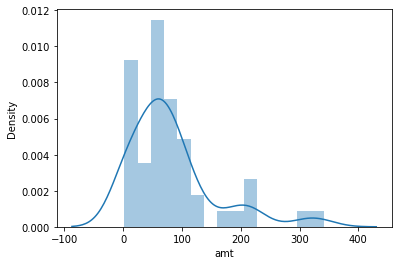

In [136]:
sns.distplot(test1['amt'])

In [137]:
test1['amtSQRT'] = np.sqrt(test1['amt'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\4011242787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['amtSQRT'] = np.sqrt(test1['amt'])


In [138]:
test1.head()

,amt,genderR,stateR,age,amtSQRT
0,4.97,0,20,35,2.229350
1,107.23,0,15,45,10.355192
2,220.11,1,41,61,14.836105
3,45.00,1,26,56,6.708204
4,41.96,1,7,37,6.477654


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amtSQRT', ylabel='Density'>

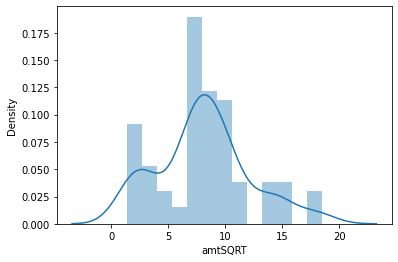

In [139]:
sns.distplot(test1['amtSQRT'])

In [140]:
test1['amtLOG'] = np.log(test1['amt'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\165662576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['amtLOG'] = np.log(test1['amt'])


In [141]:
test1.head()

,amt,genderR,stateR,age,amtSQRT,amtLOG
0,4.97,0,20,35,2.229350,1.603420
1,107.23,0,15,45,10.355192,4.674976
2,220.11,1,41,61,14.836105,5.394127
3,45.00,1,26,56,6.708204,3.806662
4,41.96,1,7,37,6.477654,3.736717


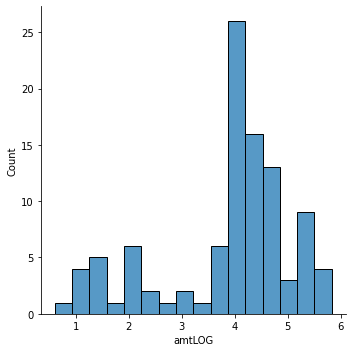

In [142]:
sns.displot(test1['amtLOG'])

In [143]:
#Homogeneity of Variance

In [144]:
scipy.stats.bartlett(test1['amtLOG'], test1['amt'])

BartlettResult(statistic=667.8057873942379, pvalue=2.997663185427467e-147)

In [145]:
#Fligners test

In [146]:
scipy.stats.fligner(test1['amtSQRT'], test1['amt'])

FlignerResult(statistic=101.02139711363873, pvalue=9.099514318725704e-24)

In [147]:
#ANOVA for gender

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='genderR', ylabel='Density'>

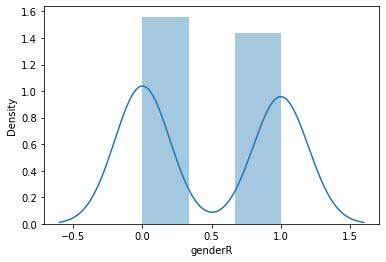

In [148]:
sns.distplot(test1['genderR'])

In [149]:
test1['genderRSQRT'] = np.sqrt(test1['genderR'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\2709121412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['genderRSQRT'] = np.sqrt(test1['genderR'])


In [150]:
test1.head()

,amt,genderR,stateR,age,amtSQRT,amtLOG,genderRSQRT
0,4.97,0,20,35,2.229350,1.603420,0.0
1,107.23,0,15,45,10.355192,4.674976,0.0
2,220.11,1,41,61,14.836105,5.394127,1.0
3,45.00,1,26,56,6.708204,3.806662,1.0
4,41.96,1,7,37,6.477654,3.736717,1.0


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='genderRSQRT', ylabel='Density'>

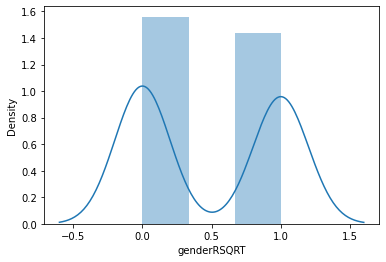

In [151]:
sns.distplot(test1['genderRSQRT'])

In [152]:
test1['genderRLOG'] = np.log(test1['genderR'])

C:\Python3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_9620\2020313024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['genderRLOG'] = np.log(test1['genderR'])


In [153]:
test1.head()

,amt,genderR,stateR,age,amtSQRT,amtLOG,genderRSQRT,genderRLOG
0,4.97,0,20,35,2.229350,1.603420,0.0,-inf
1,107.23,0,15,45,10.355192,4.674976,0.0,-inf
2,220.11,1,41,61,14.836105,5.394127,1.0,0.0
3,45.00,1,26,56,6.708204,3.806662,1.0,0.0
4,41.96,1,7,37,6.477654,3.736717,1.0,0.0


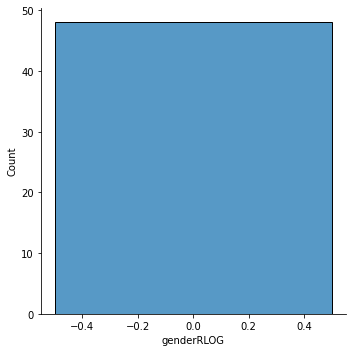

In [154]:
sns.displot(test1['genderRLOG'])

In [155]:
#Homogeneity of Variance

In [156]:
scipy.stats.bartlett(test1['genderRLOG'], test1['genderR'])

BartlettResult(statistic=nan, pvalue=nan)

In [157]:
#Fligners test

In [158]:
scipy.stats.fligner(test1['genderRSQRT'], test1['genderR'])

FlignerResult(statistic=1.398312892123436e-29, pvalue=0.999999999999997)

In [159]:
#ANOVA for state

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stateR', ylabel='Density'>

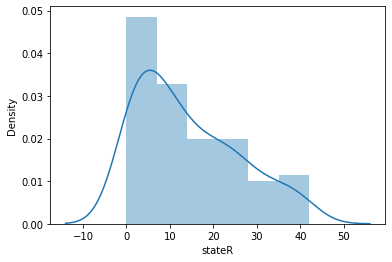

In [160]:
sns.distplot(test1['stateR'])

In [161]:
test1['stateSQRT'] = np.sqrt(test1['stateR'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\2576373613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['stateSQRT'] = np.sqrt(test1['stateR'])


In [162]:
test1.head()

,amt,genderR,stateR,age,amtSQRT,amtLOG,genderRSQRT,genderRLOG,stateSQRT
0,4.97,0,20,35,2.229350,1.603420,0.0,-inf,4.472136
1,107.23,0,15,45,10.355192,4.674976,0.0,-inf,3.872983
2,220.11,1,41,61,14.836105,5.394127,1.0,0.0,6.403124
3,45.00,1,26,56,6.708204,3.806662,1.0,0.0,5.099020
4,41.96,1,7,37,6.477654,3.736717,1.0,0.0,2.645751


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stateSQRT', ylabel='Density'>

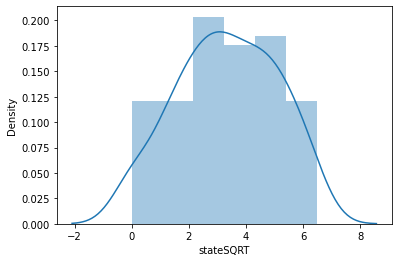

In [164]:
sns.distplot(test1['stateSQRT'])

In [165]:
test1['stateRLOG'] = np.log(test1['stateR'])

C:\Python3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_9620\3558112486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['stateRLOG'] = np.log(test1['stateR'])


In [166]:
test1.head()

,amt,genderR,stateR,age,amtSQRT,amtLOG,genderRSQRT,genderRLOG,stateSQRT,stateRLOG
0,4.97,0,20,35,2.229350,1.603420,0.0,-inf,4.472136,2.995732
1,107.23,0,15,45,10.355192,4.674976,0.0,-inf,3.872983,2.708050
2,220.11,1,41,61,14.836105,5.394127,1.0,0.0,6.403124,3.713572
3,45.00,1,26,56,6.708204,3.806662,1.0,0.0,5.099020,3.258097
4,41.96,1,7,37,6.477654,3.736717,1.0,0.0,2.645751,1.945910


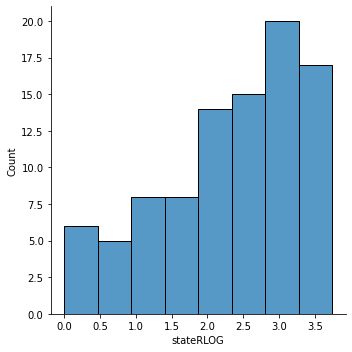

In [167]:
sns.displot(test1['stateRLOG'])

In [168]:
#Homogeneity of Variance

In [169]:
scipy.stats.bartlett(test1['stateRLOG'], test1['stateR'])

BartlettResult(statistic=nan, pvalue=nan)

In [170]:
#Fligners test

In [171]:
scipy.stats.fligner(test1['stateSQRT'], test1['stateR'])

FlignerResult(statistic=93.00196006327977, pvalue=5.224257574596894e-22)

In [172]:
#ANOVA for age

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

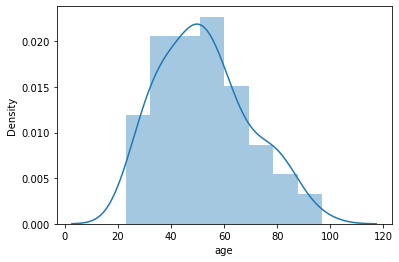

In [173]:
sns.distplot(test1['age'])

In [175]:
test1['ageSQRT'] = np.sqrt(test1['age'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9620\3453685551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['ageSQRT'] = np.sqrt(test1['age'])


In [176]:
test1.head()

,amt,genderR,stateR,age,amtSQRT,amtLOG,genderRSQRT,genderRLOG,stateSQRT,stateRLOG,ageSQRT
0,4.97,0,20,35,2.229350,1.603420,0.0,-inf,4.472136,2.995732,5.916080
1,107.23,0,15,45,10.355192,4.674976,0.0,-inf,3.872983,2.708050,6.708204
2,220.11,1,41,61,14.836105,5.394127,1.0,0.0,6.403124,3.713572,7.810250
3,45.00,1,26,56,6.708204,3.806662,1.0,0.0,5.099020,3.258097,7.483315
4,41.96,1,7,37,6.477654,3.736717,1.0,0.0,2.645751,1.945910,6.082763


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ageSQRT', ylabel='Density'>

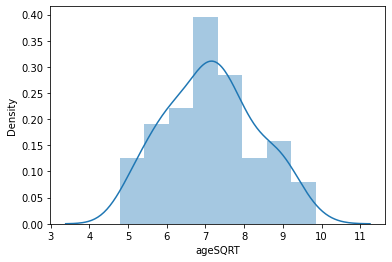

In [177]:
sns.distplot(test1['ageSQRT'])

In [178]:
test1['ageLOG'] = np.log(test1['age'])

In [179]:
test1.head()

,amt,genderR,stateR,age,amtSQRT,amtLOG,genderRSQRT,genderRLOG,stateSQRT,stateRLOG,ageSQRT,ageLOG
0,4.97,0,20,35,2.229350,1.603420,0.0,-inf,4.472136,2.995732,5.916080,3.555348
1,107.23,0,15,45,10.355192,4.674976,0.0,-inf,3.872983,2.708050,6.708204,3.806662
2,220.11,1,41,61,14.836105,5.394127,1.0,0.0,6.403124,3.713572,7.810250,4.110874
3,45.00,1,26,56,6.708204,3.806662,1.0,0.0,5.099020,3.258097,7.483315,4.025352
4,41.96,1,7,37,6.477654,3.736717,1.0,0.0,2.645751,1.945910,6.082763,3.610918


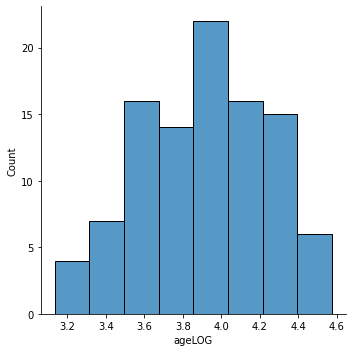

In [180]:
sns.displot(test1['ageLOG'])

In [181]:
#Homogeneity of Variance

In [182]:
scipy.stats.bartlett(test1['ageLOG'], test1['age'])

BartlettResult(statistic=638.1672130955013, pvalue=8.366529365044801e-141)

In [183]:
#Fligners test

In [184]:
scipy.stats.fligner(test1['ageSQRT'], test1['age'])

FlignerResult(statistic=107.97119956933642, pvalue=2.7271236550039227e-25)